In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
import tensorflow_datasets as tfds
imdb, info = tfds.load('imdb_reviews', with_info = True, as_supervised = True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteS0DHIW/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteS0DHIW/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteS0DHIW/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [4]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []
 #str (s.tonumpy() is needed in python3 instead of just s.numpy())

for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [5]:
vocab_size = 10000
embedding_dim = 16

max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size , oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen = max_length, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen = max_length)

In [31]:
print(testing_sentences[1])


b"A blackly comic tale of a down-trodden priest, Nazarin showcases the economy that Luis Bunuel was able to achieve in being able to tell a deeply humanist fable with a minimum of fuss. As an output from his Mexican era of film making, it was an invaluable talent to possess, with little money and extremely tight schedules. Nazarin, however, surpasses many of Bunuel's previous Mexican films in terms of the acting (Francisco Rabal is excellent), narrative and theme.<br /><br />The theme, interestingly, is something that was explored again in Viridiana, made three years later in Spain. It concerns the individual's struggle for humanity and altruism amongst a society that rejects any notion of virtue. Father Nazarin, however, is portrayed more sympathetically than Sister Viridiana. Whereas the latter seems to choose charity because she wishes to atone for her (perceived) sins, Nazarin's whole existence and reason for being seems to be to help others, whether they (or we) like it or not. Th

In [6]:
print(tokenizer)

In [ ]:
print()

In [7]:
print(training_sentences[:10])

['b"This was an absolutely terrible movie. Don\'t be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie\'s ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor\'s like Christopher Walken\'s good name. I could barely sit through it."', "b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot develo

In [8]:
print(word_index)

{'<OOV>': 1, 'the': 2, 'and': 3, 'a': 4, 'of': 5, 'to': 6, 'is': 7, 'br': 8, 'in': 9, 'it': 10, 'i': 11, 'this': 12, 'that': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'movie': 18, 'but': 19, 'film': 20, "'s": 21, 'on': 22, 'you': 23, 'not': 24, 'are': 25, 'his': 26, 'he': 27, 'have': 28, 'be': 29, 'one': 30, 'all': 31, 'at': 32, 'by': 33, 'they': 34, 'an': 35, 'who': 36, 'so': 37, 'from': 38, 'like': 39, 'her': 40, "'t": 41, 'or': 42, 'just': 43, 'there': 44, 'about': 45, 'out': 46, "'": 47, 'has': 48, 'if': 49, 'some': 50, 'what': 51, 'good': 52, 'more': 53, 'very': 54, 'when': 55, 'she': 56, 'up': 57, 'can': 58, 'b': 59, 'time': 60, 'no': 61, 'even': 62, 'my': 63, 'would': 64, 'which': 65, 'story': 66, 'only': 67, 'really': 68, 'see': 69, 'their': 70, 'had': 71, 'were': 72, 'me': 73, 'well': 74, 'we': 75, 'than': 76, 'much': 77, 'been': 78, 'get': 79, 'bad': 80, 'will': 81, 'people': 82, 'do': 83, 'also': 84, 'other': 85, 'into': 86, 'because': 87, 'great': 88, 'first': 89, 'hi

In [9]:
print(sequences[:100])

[[59, 12, 14, 35, 439, 400, 18, 174, 29, 1, 9, 33, 1378, 3401, 42, 496, 1, 197, 25, 88, 156, 19, 12, 211, 340, 29, 70, 248, 213, 9, 486, 62, 70, 88, 116, 99, 24, 5740, 12, 3317, 657, 777, 12, 18, 7, 35, 406, 8228, 178, 2477, 426, 2, 92, 1253, 140, 72, 149, 55, 2, 1, 7525, 72, 229, 70, 2962, 16, 1, 2880, 1, 1, 1506, 4998, 3, 40, 3947, 119, 1608, 17, 3401, 14, 163, 19, 4, 1253, 927, 7986, 9, 4, 18, 13, 14, 4200, 5, 102, 148, 1237, 11, 240, 692, 13, 44, 25, 101, 39, 12, 7232, 1, 39, 1378, 1, 52, 409, 11, 99, 1214, 874, 145, 10], [256, 28, 78, 585, 6, 815, 2383, 317, 109, 19, 12, 7, 643, 696, 6, 4, 2249, 5, 183, 599, 68, 1483, 114, 2289, 3, 4005, 22, 2, 1, 3, 263, 43, 4754, 4, 173, 190, 22, 12, 4126, 11, 1604, 2383, 87, 2, 20, 14, 1945, 2, 115, 950, 14, 1838, 1367, 563, 3, 365, 183, 477, 6, 602, 19, 17, 61, 1845, 5, 51, 14, 4090, 98, 42, 138, 11, 983, 11, 200, 28, 1059, 171, 5, 2, 20, 19, 11, 298, 2, 2182, 5, 10, 3, 285, 43, 477, 6, 602, 5, 94, 203, 1, 206, 102, 148, 4450, 16, 228, 336, 11

In [10]:
print(sequences[:10])

[[59, 12, 14, 35, 439, 400, 18, 174, 29, 1, 9, 33, 1378, 3401, 42, 496, 1, 197, 25, 88, 156, 19, 12, 211, 340, 29, 70, 248, 213, 9, 486, 62, 70, 88, 116, 99, 24, 5740, 12, 3317, 657, 777, 12, 18, 7, 35, 406, 8228, 178, 2477, 426, 2, 92, 1253, 140, 72, 149, 55, 2, 1, 7525, 72, 229, 70, 2962, 16, 1, 2880, 1, 1, 1506, 4998, 3, 40, 3947, 119, 1608, 17, 3401, 14, 163, 19, 4, 1253, 927, 7986, 9, 4, 18, 13, 14, 4200, 5, 102, 148, 1237, 11, 240, 692, 13, 44, 25, 101, 39, 12, 7232, 1, 39, 1378, 1, 52, 409, 11, 99, 1214, 874, 145, 10], [256, 28, 78, 585, 6, 815, 2383, 317, 109, 19, 12, 7, 643, 696, 6, 4, 2249, 5, 183, 599, 68, 1483, 114, 2289, 3, 4005, 22, 2, 1, 3, 263, 43, 4754, 4, 173, 190, 22, 12, 4126, 11, 1604, 2383, 87, 2, 20, 14, 1945, 2, 115, 950, 14, 1838, 1367, 563, 3, 365, 183, 477, 6, 602, 19, 17, 61, 1845, 5, 51, 14, 4090, 98, 42, 138, 11, 983, 11, 200, 28, 1059, 171, 5, 2, 20, 19, 11, 298, 2, 2182, 5, 10, 3, 285, 43, 477, 6, 602, 5, 94, 203, 1, 206, 102, 148, 4450, 16, 228, 336, 11

In [11]:
print(training_sentences[:10])

['b"This was an absolutely terrible movie. Don\'t be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie\'s ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor\'s like Christopher Walken\'s good name. I could barely sit through it."', "b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot develo

In [12]:
print(padded)

[[   0    0   59 ...  874  145   10]
 [   0    0    0 ...   32   31   47]
 [   1 6175    2 ...  564    5  746]
 ...
 [7629   37   11 ...  168    6   29]
 [2677   11  216 ...  249   96   45]
 [3875    5   31 ...   17    1   11]]


In [13]:
print(testing_sequences)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [14]:
print(testing_sequences[:10])

[[59, 44, 25, 109, 13, 97, 4115, 16, 742, 4370, 10, 14, 316, 5, 2, 593, 354, 16, 1864, 1212, 1, 16, 680, 7499, 5595, 1, 773, 6, 13, 1037, 1, 1, 439, 491, 1, 4, 1, 334, 3610, 20, 229, 3, 15, 5796, 3, 15, 1646, 15, 102, 5, 2, 3597, 101, 11, 1450, 1528, 12, 251, 235, 11, 216, 2, 377, 6429, 3, 62, 95, 11, 174, 105, 11, 1528, 180, 12, 251, 37, 6, 1144, 1, 682, 7, 4452, 1, 4, 1, 334, 7, 37, 8367, 377, 5, 1420, 1, 13, 30, 64, 28, 6, 874, 181, 17, 4, 1050, 5, 12, 224, 3, 83, 4, 353, 33, 353, 5229, 5, 10, 6, 1340, 1160, 2, 5738, 1, 3, 1, 5, 10, 175, 328, 7, 1319, 3989, 4, 798, 1946, 5, 4, 250, 2710, 158, 3, 2, 361, 31, 187, 25, 1170, 499, 610, 5, 2, 122, 2, 356, 1398, 7725, 30, 1, 881, 38, 4, 20, 39, 12, 1, 4, 1, 334, 7, 4, 20, 634, 60, 48, 214], [59, 4, 1, 705, 794, 5, 4, 181, 1, 2324, 1, 8813, 2, 8311, 13, 6141, 1, 14, 513, 6, 2759, 9, 114, 513, 6, 382, 4, 1720, 1, 9313, 17, 4, 4963, 5, 8693, 15, 35, 1, 38, 26, 2698, 999, 5, 20, 229, 10, 14, 35, 1, 682, 6, 6558, 17, 118, 277, 3, 590, 2740, 1,

In [15]:
print(testing_padded[:10])

[[  11 1450 1528 ...   60   48  214]
 [  26 5473    3 ...  971    1    1]
 [  21    4  615 ... 1181 1023   47]
 ...
 [   0    0    0 ...   10  100   47]
 [   5  261    1 ...   16   23   47]
 [   2    1 1062 ... 2266   17   73]]


In [17]:
print(testing_sentences[:10])

['b"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel\'s absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven\'t laughed this hard since I saw THE FULL MONTY. (And, even then, I don\'t think I laughed quite this hard... So to speak.) Tukel\'s talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there\'s none of the over-the-top scenery chewing one might\'ve expected from a film like this). DING-A-LING-LESS is a film whose time has come."', 'b"A blackly comic tale of a down-trodden pries

In [18]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [20]:
print(reverse_word_index)

{1: '<OOV>', 2: 'the', 3: 'and', 4: 'a', 5: 'of', 6: 'to', 7: 'is', 8: 'br', 9: 'in', 10: 'it', 11: 'i', 12: 'this', 13: 'that', 14: 'was', 15: 'as', 16: 'for', 17: 'with', 18: 'movie', 19: 'but', 20: 'film', 21: "'s", 22: 'on', 23: 'you', 24: 'not', 25: 'are', 26: 'his', 27: 'he', 28: 'have', 29: 'be', 30: 'one', 31: 'all', 32: 'at', 33: 'by', 34: 'they', 35: 'an', 36: 'who', 37: 'so', 38: 'from', 39: 'like', 40: 'her', 41: "'t", 42: 'or', 43: 'just', 44: 'there', 45: 'about', 46: 'out', 47: "'", 48: 'has', 49: 'if', 50: 'some', 51: 'what', 52: 'good', 53: 'more', 54: 'very', 55: 'when', 56: 'she', 57: 'up', 58: 'can', 59: 'b', 60: 'time', 61: 'no', 62: 'even', 63: 'my', 64: 'would', 65: 'which', 66: 'story', 67: 'only', 68: 'really', 69: 'see', 70: 'their', 71: 'had', 72: 'were', 73: 'me', 74: 'well', 75: 'we', 76: 'than', 77: 'much', 78: 'been', 79: 'get', 80: 'bad', 81: 'will', 82: 'people', 83: 'do', 84: 'also', 85: 'other', 86: 'into', 87: 'because', 88: 'great', 89: 'first', 90:

In [21]:
def decode_review(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [22]:
print(decode_review(padded[1]))
print(training_sentences[1])

? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all '
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of 

In [24]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                             tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
                             tf.keras.layers.Dense(6, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [25]:
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics =['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [39]:
print(padded[1])
print(training_labels_final[100])
print(testing_padded[1])
print(testing_labels_final[1])

[   0    0    0    0    0    0    0  256   28   78  585    6  815 2383
  317  109   19   12    7  643  696    6    4 2249    5  183  599   68
 1483  114 2289    3 4005   22    2    1    3  263   43 4754    4  173
  190   22   12 4126   11 1604 2383   87    2   20   14 1945    2  115
  950   14 1838 1367  563    3  365  183  477    6  602   19   17   61
 1845    5   51   14 4090   98   42  138   11  983   11  200   28 1059
  171    5    2   20   19   11  298    2 2182    5   10    3  285   43
  477    6  602    5   94  203    1  206  102  148 4450   16  228  336
   11 2510  392   12   20   32   31   47]
1
[  26 5473    3    9    4 3319  339   48    6 2285  199    2  113   27
   48   78  981   42    2 4096  113   13    7  881    5    4 2324   25
   37  927   87   34 4450   26 1539 5112    3   75   25  117  180  250
  734   10 1309 7077   42   24    8    8   12    7    4 1758   20    3
   11   64 4269  254  935    9  363  436    6 2767   10   46   10    7
   30    5    1   92  736  109   

In [26]:
history =model.fit(padded, training_labels_final, epochs = 50, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 14s 18ms/step - loss: 0.5344 - accuracy: 0.7006 - val_loss: 0.4270 - val_accuracy: 0.8084
Epoch 2/50
782/782 [==============================] - 13s 17ms/step - loss: 0.3191 - accuracy: 0.8700 - val_loss: 0.3852 - val_accuracy: 0.8414
Epoch 3/50
782/782 [==============================] - 13s 17ms/step - loss: 0.2484 - accuracy: 0.9049 - val_loss: 0.3721 - val_accuracy: 0.8391
Epoch 4/50
782/782 [==============================] - 13s 17ms/step - loss: 0.1979 - accuracy: 0.9273 - val_loss: 0.4165 - val_accuracy: 0.8349
Epoch 5/50
782/782 [==============================] - 13s 17ms/step - loss: 0.1581 - accuracy: 0.9425 - val_loss: 0.4581 - val_accuracy: 0.8292
Epoch 6/50
782/782 [==============================] - 13s 17ms/step - loss: 0.1160 - accuracy: 0.9598 - val_loss: 0.5085 - val_accuracy: 0.8203
Epoch 7/50
782/782 [==============================] - 13s 17ms/step - loss: 0.0840 - accuracy: 0.9726 - val_loss: 0.6042 - val_accuracy:

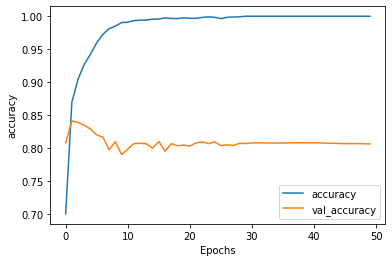

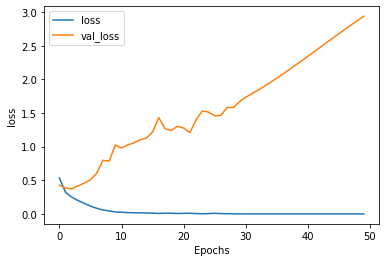

In [27]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])

  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')